## Preprocessing

In [182]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


__What variable(s) are the target(s) for your model?__

'IS_SUCCESSFUL'

__What variable(s) are the feature(s) for your model?__

All other columns

In [183]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=['EIN', 'NAME'])

In [184]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [185]:
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


### Application Type

In [186]:
# Look at APPLICATION_TYPE value counts for binning
app_type = application_df['APPLICATION_TYPE'].value_counts()
app_type

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64

In [187]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = app_type.loc[app_type.values < 100].index

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
Other      120
Name: count, dtype: int64

### Classification

In [188]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df['CLASSIFICATION'].value_counts()
class_counts

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64

In [189]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_counts.loc[class_counts > 1]

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64

In [190]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = class_counts.loc[class_counts.values < 100].index

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      669
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Name: count, dtype: int64

### Feature Engineering

In [191]:
application_df['ASK_AMT']

0            5000
1          108590
2            5000
3            6692
4          142590
           ...   
34294        5000
34295        5000
34296        5000
34297        5000
34298    36500179
Name: ASK_AMT, Length: 34299, dtype: int64

In [192]:
application_df['INCOME_AMT']

0                    0
1               1-9999
2                    0
3          10000-24999
4        100000-499999
             ...      
34294                0
34295                0
34296                0
34297                0
34298            1M-5M
Name: INCOME_AMT, Length: 34299, dtype: object

In [193]:
application_df.loc[application_df['INCOME_AMT'] != '0']['INCOME_AMT'].value_counts()

INCOME_AMT
25000-99999      3747
100000-499999    3374
1M-5M             955
1-9999            728
10000-24999       543
10M-50M           240
5M-10M            185
50M+              139
Name: count, dtype: int64

In [194]:
# Split the bounded values by the hyphen and create new columns
application_df[['LOWER_INCOME', 'UPPER_INCOME']] = application_df['INCOME_AMT'].str.split('-', expand=True)

In [195]:
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,LOWER_INCOME,UPPER_INCOME
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0,None
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1,9999
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,None
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,10000,24999
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100000,499999


In [196]:
# If `INCOME_AMT` is '0', set UPPER_INCOME to 0.
application_df['UPPER_INCOME'] = application_df['UPPER_INCOME'].fillna(0)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,LOWER_INCOME,UPPER_INCOME
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0,0
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1,9999
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,10000,24999
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100000,499999


In [197]:
# If `INCOME AMT` contains "M", convert to e6.
application_df['UPPER_INCOME'] = application_df['UPPER_INCOME'].str.replace('M', 'e6')
application_df['LOWER_INCOME'] = application_df['LOWER_INCOME'].str.replace('M', 'e6')

In [198]:
# Check the income value with `50M+`
application_df.loc[application_df['INCOME_AMT'] == '50M+']

# Convert to 50e6
application_df['LOWER_INCOME'] = application_df['LOWER_INCOME'].replace('50e6+', '50e6')

# Convert column to integer
application_df['LOWER_INCOME'] = pd.to_numeric(application_df['LOWER_INCOME']).astype(int)

In [199]:
# Create a new column that compares the ASK_AMT to LOWER_INCOME
application_df['ASK_VS_INCOME'] = (application_df['ASK_AMT'] > application_df['LOWER_INCOME']).astype(int)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL,LOWER_INCOME,UPPER_INCOME,ASK_VS_INCOME
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1,0,NaN,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1,1,9999,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0,0,NaN,1
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1,10000,24999,0
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1,100000,499999,1


In [200]:
# Drop the UPPER_INCOME column
application_df = application_df.drop(columns=['LOWER_INCOME', 'UPPER_INCOME'])

### Encoding

In [201]:
# Convert categorical data to numeric with `pd.get_dummies`
categorical_hot = list(application_df.select_dtypes(include="object").columns)
encoded_columns = pd.get_dummies(application_df[categorical_hot]).astype(int)
encoded_columns.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,APPLICATION_TYPE_T9,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [202]:
# Split our preprocessed data into our features and target arrays

# Isolate the target array
y = application_df['IS_SUCCESSFUL']

# Isolate the feature array
X = application_df.drop(columns=['IS_SUCCESSFUL'])

# Replace features with encoded equivalents
X.drop(categorical_hot, axis=1, inplace=True)

# Calculate updated feature array
X = pd.concat([X, encoded_columns], axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [203]:
# Display the feature array
X.head()

,STATUS,ASK_AMT,ASK_VS_INCOME,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [204]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [205]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train.columns)
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30

# Initialise sequential model
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(
    units = hidden_nodes_layer1,
    input_dim = number_input_features,
    activation = "relu"
))

# Second hidden layer
nn.add(tf.keras.layers.Dense(
    units = hidden_nodes_layer2,
    activation = "relu"
))


# Output layer
nn.add(tf.keras.layers.Dense(
    units = 1,
    activation = "sigmoid"
))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 80)                4160      
                                                                 
 dense_8 (Dense)             (None, 30)                2430      
                                                                 
 dense_9 (Dense)             (None, 1)                 31        
                                                                 
Total params: 6621 (25.86 KB)
Trainable params: 6621 (25.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [206]:
# Compile the model
nn.compile(
    loss = "binary_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [207]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoints filepath
filepath = "weights-improvement-{epoch:02d}-{accuracy:.2f}.hdf5"

# Create a checkpoint
checkpoint = ModelCheckpoint(
    filepath,
    monitor='accuracy',
    verbose=1,
    save_best_only=True,
    mode='max'
)

# Create the callbacks list
callbacks_list = [checkpoint]

In [208]:
# Train the model
fit_model = nn.fit(
    X_train_scaled,
    y_train,
    epochs = 100,
    callbacks = callbacks_list,
    verbose = 0
)


Epoch 1: accuracy improved from -inf to 0.71843, saving model to weights-improvement-01-0.72.hdf5


/Users/alyssahondrade/anaconda3/envs/dev/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: accuracy improved from 0.71843 to 0.72971, saving model to weights-improvement-02-0.73.hdf5

Epoch 3: accuracy improved from 0.72971 to 0.73142, saving model to weights-improvement-03-0.73.hdf5

Epoch 4: accuracy did not improve from 0.73142

Epoch 5: accuracy improved from 0.73142 to 0.73340, saving model to weights-improvement-05-0.73.hdf5

Epoch 6: accuracy did not improve from 0.73340

Epoch 7: accuracy did not improve from 0.73340

Epoch 8: accuracy improved from 0.73340 to 0.73426, saving model to weights-improvement-08-0.73.hdf5

Epoch 9: accuracy did not improve from 0.73426

Epoch 10: accuracy did not improve from 0.73426

Epoch 11: accuracy did not improve from 0.73426

Epoch 12: accuracy improved from 0.73426 to 0.73527, saving model to weights-improvement-12-0.74.hdf5

Epoch 13: accuracy did not improve from 0.73527

Epoch 14: accuracy improved from 0.73527 to 0.73542, saving model to weights-improvement-14-0.74.hdf5

Epoch 15: accuracy did not improve from 0.7354

In [209]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(
    X_test_scaled,
    y_test,
    verbose = 2
)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5642 - accuracy: 0.7277 - 125ms/epoch - 468us/step
Loss: 0.5642213225364685, Accuracy: 0.7276967763900757


In [31]:
# Export our model to HDF5 file
nn.save('iteration_1.h5', save_format='h5')

In [210]:
def create_model(hp):
    nn_model = tf.keras.models.Sequential()
    
    # Choose activation function in hidden layers
    activation_layer_first = hp.Choice('activation_first_layer', ['relu', 'leaky_relu', 'tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(
        units = hp.Int(
            'first_units',
            min_value = 1,
            max_value = number_input_features * 2 - 1,
            step = 10),
        activation = activation_layer_first,
        input_dim = number_input_features
    ))
    
    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        # Choose a different activation function for each layer
        activation_layer_i = hp.Choice(f'activation_layer_{i}', ['relu', 'leaky_relu', 'tanh', 'selu', 'elu', 'exponential'])
        
        nn_model.add(tf.keras.layers.Dense(
            units = hp.Int(
                'units_' + str(i),
                min_value = 1,
                max_value = number_input_features * 2 - 1,
                step = 10),
            activation = activation_layer_i
        ))
    
    # Add the output layer
    nn_model.add(tf.keras.layers.Dense(
        units = 1,
        activation = "sigmoid"
    ))
    
    # Compile the model
    nn_model.compile(
        loss = "binary_crossentropy",
        optimizer = "adam",
        metrics = ["accuracy"]
    )
    
    return(nn_model)

In [211]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective = "val_accuracy",
    max_epochs = 25,
    hyperband_iterations = 2
)

In [212]:
tuner.search(
    X_train_scaled,
    y_train,
    epochs = 25,
    validation_data = (X_test_scaled, y_test)
)

Trial 60 Complete [00h 00m 16s]
val_accuracy: 0.7302623987197876

Best val_accuracy So Far: 0.7338775396347046
Total elapsed time: 00h 06m 55s


In [213]:
# Get the top 3 model hyperparameters
best_hyper = tuner.get_best_hyperparameters(3)

from pprint import pprint
for model in best_hyper:
    pprint(model.values)

{'activation_first_layer': 'relu',
 'activation_layer_0': 'tanh',
 'activation_layer_1': 'elu',
 'activation_layer_2': 'elu',
 'activation_layer_3': 'leaky_relu',
 'activation_layer_4': 'tanh',
 'activation_layer_5': 'elu',
 'first_units': 41,
 'num_layers': 4,
 'tuner/bracket': 1,
 'tuner/epochs': 25,
 'tuner/initial_epoch': 9,
 'tuner/round': 1,
 'tuner/trial_id': '0053',
 'units_0': 91,
 'units_1': 11,
 'units_2': 31,
 'units_3': 41,
 'units_4': 11,
 'units_5': 81}
{'activation_first_layer': 'relu',
 'activation_layer_0': 'relu',
 'activation_layer_1': 'relu',
 'activation_layer_2': 'elu',
 'activation_layer_3': 'elu',
 'activation_layer_4': 'elu',
 'activation_layer_5': 'leaky_relu',
 'first_units': 41,
 'num_layers': 3,
 'tuner/bracket': 2,
 'tuner/epochs': 25,
 'tuner/initial_epoch': 9,
 'tuner/round': 2,
 'tuner/trial_id': '0043',
 'units_0': 41,
 'units_1': 91,
 'units_2': 51,
 'units_3': 91,
 'units_4': 31,
 'units_5': 31}
{'activation_first_layer': 'leaky_relu',
 'activation_

In [219]:
# Assuming you have a compiled Keras model 'model' and training data 'X_train', 'y_train'
history = nn.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_test_scaled, y_test))

# Extract training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

Epoch 1/100
804/804 [==============================] - 1s 633us/step - loss: 0.5290 - accuracy: 0.7428 - val_loss: 0.5619 - val_accuracy: 0.7294
Epoch 2/100
804/804 [==============================] - 0s 592us/step - loss: 0.5293 - accuracy: 0.7425 - val_loss: 0.5624 - val_accuracy: 0.7270
Epoch 3/100
804/804 [==============================] - 0s 592us/step - loss: 0.5287 - accuracy: 0.7414 - val_loss: 0.5618 - val_accuracy: 0.7294
Epoch 4/100
804/804 [==============================] - 0s 589us/step - loss: 0.5288 - accuracy: 0.7425 - val_loss: 0.5613 - val_accuracy: 0.7272
Epoch 5/100
804/804 [==============================] - 0s 591us/step - loss: 0.5285 - accuracy: 0.7421 - val_loss: 0.5637 - val_accuracy: 0.7287
Epoch 6/100
804/804 [==============================] - 0s 598us/step - loss: 0.5285 - accuracy: 0.7423 - val_loss: 0.5616 - val_accuracy: 0.7269
Epoch 7/100
804/804 [==============================] - 0s 598us/step - loss: 0.5287 - accuracy: 0.7427 - val_loss: 0.5631 - val_ac

NameError: name 'plt' is not defined

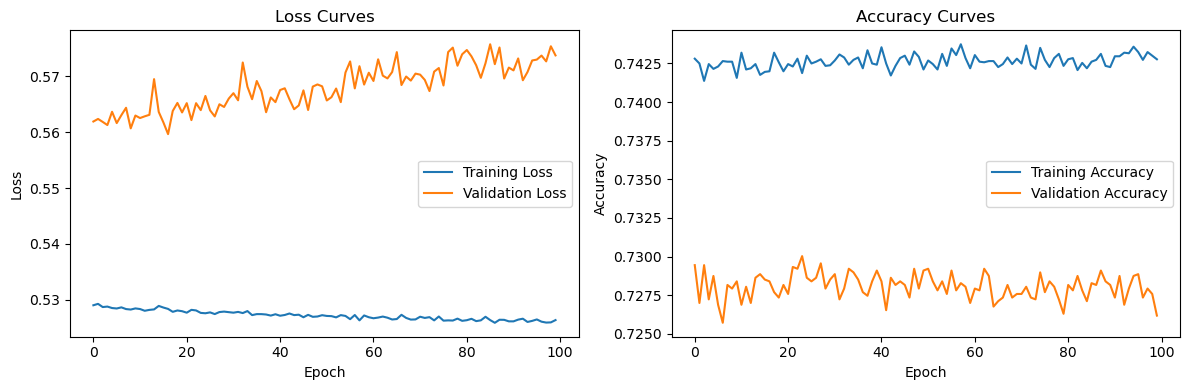

In [220]:
from matplotlib import pyplot as plt
# Plotting the learning curves
plt.figure(figsize=(12, 4))

# Plot loss curves
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy curves
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()